In [1]:
import pandas as pd

In [2]:
stack_overflow = pd.read_feather('data/stack_overflow.feather')
stack_overflow.head()

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30
2,69.0,I am a developer by profession,Yes,25.0,12.0,child,Yearly,550000.0,594539.0,France,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13.0,3.0,Under 30
3,125.0,"I am not primarily a developer, but I write co...",Yes,41.0,30.0,adult,Monthly,200000.0,2000000.0,United States,...,Appropriate in length,No,None,None,None,Just as welcome now as I felt last year,40.0,11.0,11.0,At least 30
4,147.0,"I am not primarily a developer, but I write co...",No,28.0,15.0,adult,Yearly,50000.0,37816.0,Canada,...,Appropriate in length,No,"Another engineering discipline (such as civil,...",None,Express;Flask,Just as welcome now as I felt last year,40.0,5.0,3.0,Under 30


### A hypothesis:
- The mean annual compensation of the population of data scientists is $110,000

In [3]:
# The point estimate (sample statistic)
mean_comp_samp = stack_overflow['converted_comp'].mean()
mean_comp_samp

119574.71738168952

    The result is different from our hypothesis, but is it meaningfully different?

In [4]:
import numpy as np
### Generating a bootstrap distribution

boot_distn = []
for i in range(5000):
    boot_distn.append(
# step 1. Resample
            np.mean(
            stack_overflow.sample(frac=1,replace=True)['converted_comp']
                    )

    )

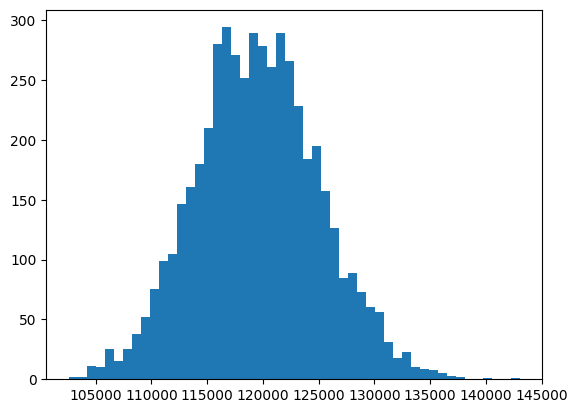

In [5]:
import matplotlib.pyplot as plt

plt.hist(boot_distn,bins=50)
plt.show()

It's bell shape, meaning that it's roughly normally distributed. Notice that $110,000 is on the left of the distribution.

The standard deviation of the sample statistics in the bootstrap distribution estimates the standard error of the statistic.

In [6]:
# Standard error
std_error = np.std(boot_distn,ddof=1)
std_error

5545.449864336373

### Z-Scores
Since variables have arbitrary units and ranges, before we test our hypothesis, we need to standardize the values.

standardized value = (value - mean) / standard deviation

z = (sample stat - hypoth.param.value) / standard error

In [7]:
mean_comp_hyp = 110000

z_score = (mean_comp_samp - mean_comp_hyp)/std_error
z_score

1.7265898377814177

### Hypothesis testing use case:

Determine whether sample statistics are close to or far away from expected (or 'hypothesized' values)

    Standard normal (z) distribution = Z distribution

In [8]:
late_shipments = pd.read_feather('data/avocado.feather')
late_shipments.head()

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2996.0,266644.00,89.00,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,25.0,800.00,32.00,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,...,22925.0,110040.00,4.80,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57
3,17648.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,...,152535.0,361507.95,2.37,0.04,"Aurobindo Unit III, India",Yes,7698.0,11372.23,expensive,779.41
4,5647.0,Uganda,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test - Ancillary,...,850.0,8.50,0.01,0.00,Inverness Japan,Yes,56.0,360.00,reasonable,0.01


In [9]:
# Calculate the proportion of late shipments
late_prop_samp = (late_shipments['late'] == 'Yes').mean()

# Print the results
print(late_prop_samp)

0.061


In [10]:
late_shipments_boot_distn=[]
for i in range(5000):
    ships_samp = late_shipments.sample(frac=1,replace=True)
    late_shipments_boot_distn.append(
        (ships_samp['late']=='Yes').mean()
    )

In [11]:
# Hypothesize that the proportion is 6%
late_prop_hyp = 0.06

In [12]:
# Calculate the standard error
std_error = np.std(late_shipments_boot_distn,ddof=1)
std_error

0.007551955866362138

In [13]:
# Find z-score of late_prop_samp
z_score = (late_prop_samp-late_prop_hyp)/std_error
z_score

0.1324160280721704

### P-Value
A hypothesis is a statement about a population parameter. We don't know the true value of this population parameter; we can only make inferences about it from the data.

p-values: Probability of obtaining a result, assuming the null hypothesis is true.
- large p-value,large support for H0
    - Statistic likely ***not in*** the tail of the null distribution
- Small p-value, strong evidence against H0
    - Statistic likely in the tail of the null distribution


Hypothesis tests compare two competing hypotheses.
    - The null hypothesis is the existing idea
    - The alternative hypothesis is the new challenger idea of the researcher

***
### Problems:
- H0: The proportion of data scientists starting programming as children is 35%
- HA: The proportion of data scientists starting programming as children is greater than 35% - Right-Tailed test
***

- Either HA or H0 is true (not both)
- initally, H0 is assumed to be true - This only changes if the sample provides enough evidence to reject it.
- If the evidence from the sample is 'significant' that HA is true, reject H0, else choose H0.
- Significance level is 'beyond a reasonable doubt' for hypothesis testing.
***
- Hypothesis tests check if the sample statistics lie in the tails of the null distribution, which is the distribution of the statistic if the null hypothesis was true.
***
- alternative different from null --> two tailed
- alternative greater than null -->  right tailed
- alternative less than null -->  left tailed

In [14]:
prop_child_samp = (stack_overflow['age_first_code_cut']=='child').mean()
prop_child_samp

0.39141972578505085

In [15]:
prop_child_hyp = 0.35

In [16]:
first_code_boot_distn = []
for i in range(2000):
    samp = stack_overflow.sample(frac=1,replace=True)
    first_code_boot_distn.append((samp['age_first_code_cut']=='child').mean())

In [17]:
std_error = np.std(first_code_boot_distn,ddof=1)
std_error

0.010197694695424975

In [18]:
z_score = (prop_child_samp - prop_child_hyp)/std_error
z_score

4.06167541019179

In [19]:
# p-value
from scipy.stats import norm
1 -norm.cdf(z_score,loc=0,scale=1)

2.436089457436008e-05

    Conclusion:

    We reject the null hypothesis. We have strong evidence for the alternative hypothesis that the proportion of data scientists that started programming as children is greater than 35 percent.

### Confidence intervals

For a significance level of $\alpha$, it's common to choose a confidence interval level of 1-$\alpha$
- $\alpha$ = 0.05 -> 95%

In [20]:
import numpy as np

lower = np.quantile(first_code_boot_distn,0.025)
upper = np.quantile(first_code_boot_distn,0.975)
print((lower,upper))

(0.3710747456877488, 0.4117647058823529)


if the hypothesized population parameter(0.35) is within the confidence interval, you should fail to reject the null hypothesis.
In this case, 0.35 is outside of the confidence interval[0.37,0.41],thus we should reject the null hypothesis due to large p-value.

The confidence interval provides a range of plausible values for the population proportion of data scientists that programmed as children.

### Types of errors

- if we support the alternative hypothesis when the null hypothesis was correct, we made ***False Positive Error*** (type 1)
- if we support the null hypothesis when the alternative was correct, we made ***False Negative Error*** (type 2)
***
- In the case of data scientists coding as children, if we had a p-value less than or equal to the significance level, and reject the null hypothesis, it's possible we made a false positive error. Although we thought data scientists started coding as children at a higher rate, it may not be true in the whole population.
- Conversely, if the p-value was greater than the significance level, and we failed to reject the null hypothesis, it's possible we made a false negative error.


### Two-sample problems

The hypothesis test for determining if there is a difference between the means of two populations (t-Test)
- compare sample statistics across groups of a variable
- converted_comp is a numerical variable
- age_first_code_cut is a categorical variable with level('child' and 'adult')
***
***Hypotheses***:

>H<sub>0</sub>: The mean compensation(in USD) is the ***same*** for those that coded first as a child and those that coded first as an adult: $\mu$<sub>child</sub> = $\mu$<sub>adult</sub>

>H<sub>A</sub>: The mean compensation(in USD) is the ***greater*** for those that coded first as a child and those that coded first as an adult:$\mu$<sub>child</sub> > $\mu$<sub>adult</sub>

In [21]:
# Calculating groupwise summary stats
stack_overflow.groupby('age_first_code_cut')['converted_comp'].mean()

age_first_code_cut
adult    111313.311047
child    132419.570621
Name: converted_comp, dtype: float64

Here, the child programmers have a mean compensation of 132,000 dollars compared to around 111,000 for adult programmers. Is that increase statistically significant or could it be explained by sampling variability?

- $\bar{x}$: a sample mean
- $\bar{x}$<sub>child</sub>: sample mean compensation for coding first as a child
- $\bar{x}$<sub>adult</sub>: sample mean compensation for coding first as an adult
- $\bar{x}$<sub>child</sub> - $\bar{x}$<sub>adult</sub> : a test statistic

- $$Z =\frac{sample~stat - population~parameter}{standard~error}$$
<br/><br/>

- $$t =\frac{difference~in~sample~stats - difference~in~population~parameters}{standard~error}$$
<br/><br/>

- $$t =\frac{(\bar{x}_{child}- \bar{x}_{adult}) - (\mu_{child}- \mu_{adult})}{SE(\bar{x}_{child}- \bar{x}_{adult})}$$
<br/><br/>

- $$SE{(\bar{x}_{child}- \bar{x}_{adult})} \approx \sqrt{\frac{s^2_{child}}{n_{child}}+\frac{s^2_{adult}}{n_{adult}}}$$ 
    - s is the standard deviation of the variable
    - n is the sample size(number of observations/rows in sample)
    - Using a sample standard deviation to estimate the standard error is computationally easier than using bootstrapping
<br/><br/>
***
***Assuming the null hypothesis is true***

>$$H_{0}: \mu_{child} - \mu_{adult} = 0  ~\rightarrow~ t = \frac{\bar{x}_{child}-\bar{x}_{adult}}{SE(\bar{x}_{child}-\bar{x}_{adult})} = \sqrt{\frac{s^2_{child}}{n_{child}}+\frac{s^2_{adult}}{n_{adult}}} $$



In [22]:
x_bar = stack_overflow.groupby('age_first_code_cut')['converted_comp'].mean()
x_bar

age_first_code_cut
adult    111313.311047
child    132419.570621
Name: converted_comp, dtype: float64

In [23]:
s = stack_overflow.groupby('age_first_code_cut')['converted_comp'].std()
s

age_first_code_cut
adult    271546.521729
child    255585.240115
Name: converted_comp, dtype: float64

In [24]:
n = stack_overflow.groupby('age_first_code_cut')['converted_comp'].count()
n

age_first_code_cut
adult    1376
child     885
Name: converted_comp, dtype: int64

In [25]:
numerator = x_bar['child'] - x_bar['adult']
denominator = np.sqrt(s['child']**2/n['child'] + s['adult']**2/n['adult'])
t_stat = numerator/denominator
t_stat

1.8699313316221844

In [26]:
# Significance level
alpha = 0.1

# degrees of freedom
dof = n['child'] + n['adult'] -2

# calculate p-value
from scipy.stats import t
1 - t.cdf(t_stat,df = dof)

0.030811302165157595

>***This p-value is less than the significance level of 0.1, so we should reject the null hypothesis in favor of the alternative hypothesis that Stack Overflow data scientists who started coding as children earn more.***

>While trying to determine why some shipments are late, you may wonder if the weight of the shipments that were on time is less than the weight of the shipments that were late. 

***Hypotheses***:

>H<sub>0</sub>: The mean weight of shipments that weren't late is the same as the mean weight of shipments that were late.

>H<sub>A</sub>: The mean weight of shipments that weren't late is less than the mean weight of shipments that were late.

In [27]:
late_shipments.groupby('late')['weight_kilograms'].mean()

late
No     1897.791267
Yes    2715.672131
Name: weight_kilograms, dtype: float64

In [28]:
xbar_no = late_shipments.groupby('late')['weight_kilograms'].mean()['No']
xbar_yes = late_shipments.groupby('late')['weight_kilograms'].mean()['Yes']

In [29]:
s = late_shipments.groupby('late')['weight_kilograms'].std()
s

late
No     3154.039507
Yes    2544.688211
Name: weight_kilograms, dtype: float64

In [30]:
n_no = late_shipments.groupby('late')['weight_kilograms'].count()['No']
n_yes = late_shipments.groupby('late')['weight_kilograms'].count()['Yes']


In [31]:
s_no = s['No']
s_yes = s['Yes']

In [32]:
numerator = xbar_no - xbar_yes
denominator = np.sqrt(s_no**2/s_no + s_yes**2/n_yes)
t_stat = numerator/denominator
print(t_stat)

-2.473788456276661


alpha = 0.05

In [33]:
# Calculate the degrees of freedom
degrees_of_freedom = n_no + n_yes - 2
# Calculate the p-value from the test stat
p_value = t.cdf(t_stat,df=degrees_of_freedom)
print(p_value)

0.006767173524295259


>***This p-value is less than the significance level of 0.05, so we should reject the null hypothesis in favor of the alternative hypothesis that the weight of shipments that weren't late is less than the mean weight of shipments that were late.***

***

In [34]:
rep_vote = pd.read_feather('data/repub_votes_potus_08_12.feather')
rep_vote.head()

,state,county,repub_percent_08,repub_percent_12
0,Alabama,Hale,38.957877,37.139882
1,Arkansas,Nevada,56.726272,58.983452
2,California,Lake,38.896719,39.331367
3,California,Ventura,42.923190,45.250693
4,Colorado,Lincoln,74.522569,73.764757


### Paired t-test
    Hypotheses:
        Question: Was the percentage of Republican candidate votes lower in 2008 than 2012?
        
>$H_{0}$: $\mu_{2008}$ - $\mu_{2012}$ = 0
<br>
<br>
>$H_{A}$: $\mu_{2008}$ - $\mu_{2012}$ < 0

- Set $\alpha$ = 0.05 significance level
- Data is paired $~\rightarrow~$ each voter percentage refers to the same county, which means they aren't independent.
    - want to capture voting patterns in model

<AxesSubplot: >

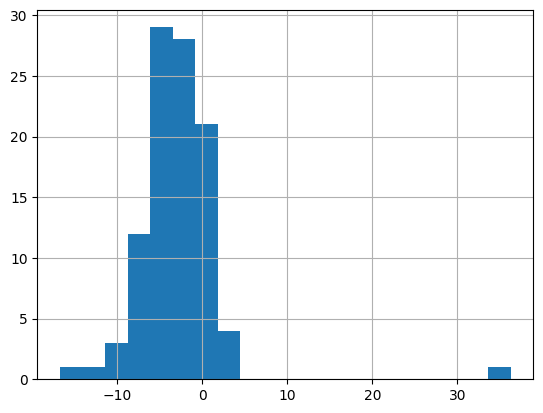

In [35]:
rep_vote['diff'] = rep_vote['repub_percent_08'] - rep_vote['repub_percent_12']
rep_vote['diff'].hist(bins=20)

In [36]:
xbar_diff = rep_vote['diff'].mean()
xbar_diff

-2.877109041242944

    New Hypotheses:
        
>$H_{0}$: $\mu_{diff}$  = 0
<br>
<br>
>$H_{A}$: $\mu_{diff}$  < 0

$$ t = \frac{\bar{x}_{diff}-\mu_{diff}}{\sqrt{\frac{s^2_{diff}}{n_{diff}}}} $$
- Assuming $H_{0}$ is true $~\rightarrow~$ $\mu_{diff}$ = 0
<br>
- We have on statistic, so the number of degrees of freedom is the number of pairs minus one

- $$ df = n_{diff} -1 $$

In [37]:
n_diff = len(rep_vote)
n_diff

100

In [38]:
s_diff = rep_vote['diff'].std()
s_diff

5.136737887231852

In [39]:
t_stat = (xbar_diff - 0)/np.sqrt(s_diff**2/n_diff)
t_stat

-5.601043121928489

In [40]:
degrees_of_freedom = n_diff -1

In [41]:
p_value = t.cdf(t_stat,df=degrees_of_freedom)
p_value

9.572537285272413e-08

The p-value is really small at around 9.56 x $10^{-8}$. That means we reject the null hypothesis in favor of the alternative hypothesis that the Republican candidates got a smaller percentage of the vote in 2008 compared to 2012.

In [42]:
import pingouin
# y specifies the hypothesized difference value from the null hypothesis, which is zero
pingouin.ttest(x = rep_vote['diff'],y=0,alternative='less')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.560104,1.323e+05,1.0


In [43]:
pingouin.ttest(x=rep_vote['repub_percent_08'],
               y=rep_vote['repub_percent_12'], 
               paired=True, 
               alternative='less')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.217364,1.323e+05,0.696338


In [44]:
# unpaired ttest
pingouin.ttest(x=rep_vote['repub_percent_08'],
               y=rep_vote['repub_percent_12'], 
               alternative='less')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.536997,198,less,0.062945,"[-inf, 0.22]",0.217364,0.927,0.454972


    When you have paired data, a paired t-test is preferable to the unpaired version because it reduces the chance of a false negative error.

***

In [45]:
stack_overflow['job_sat'].value_counts()

Very satisfied           879
Slightly satisfied       680
Slightly dissatisfied    342
Neither                  201
Very dissatisfied        159
Name: job_sat, dtype: int64

> Is mean annual compensation different for different levels of job satisfaction?

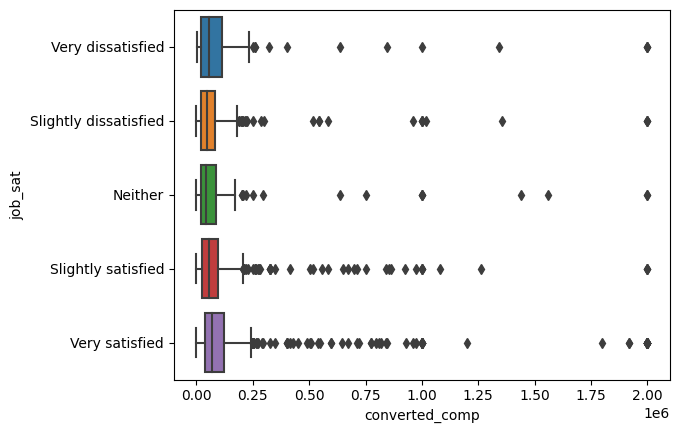

In [46]:
import seaborn as sns
sns.boxplot(x='converted_comp',y='job_sat',data=stack_overflow)
plt.show()

### Analysis of variance (ANAOVA)

So far in this chapter, we've only considered the case of differences in a numeric variable between two categories. Of course, many datasets contain more categories. Before you get to conducting tests on many categories, it's often helpful to perform exploratory data analysis (EDA), calculating summary statistics for each group and visualizing the distributions of the numeric variable for each category using box plots.


- A test for differences between groups

In [47]:
alpha = 0.2

In [48]:
pingouin.anova(data=stack_overflow,dv='converted_comp',between='job_sat')

,Source,ddof1,ddof2,F,p-unc,np2
0,job_sat,4,2256,4.480485,0.001315,0.007882


- 0.001315 < $\alpha$ 
- At least two categories have significantly different compensation
- But doesn't tell us which two categories they are

### pairwise_tests()
- to run all these hypothesis tests in one go, we can use pairwise_tests

In [49]:
pingouin.pairwise_tests(data=stack_overflow, 
                        dv='converted_comp', 
                        between = 'job_sat', 
                        padjust = 'none')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,158.564,-0.192931
1,job_sat,Slightly satisfied,Neither,False,True,-0.700752,258.204546,two-sided,0.484088,0.114,-0.068513
2,job_sat,Slightly satisfied,Very dissatisfied,False,True,-1.243665,187.153329,two-sided,0.215179,0.208,-0.145624
3,job_sat,Slightly satisfied,Slightly dissatisfied,False,True,-0.038264,569.926329,two-sided,0.969491,0.074,-0.002719
4,job_sat,Very satisfied,Neither,False,True,1.662901,328.326639,two-sided,0.097286,0.337,0.120115
5,job_sat,Very satisfied,Very dissatisfied,False,True,0.747379,221.666205,two-sided,0.455627,0.126,0.063479
6,job_sat,Very satisfied,Slightly dissatisfied,False,True,3.076222,821.303063,two-sided,0.002166,7.43,0.173247
7,job_sat,Neither,Very dissatisfied,False,True,-0.545948,321.165726,two-sided,0.585481,0.135,-0.058537
8,job_sat,Neither,Slightly dissatisfied,False,True,0.602209,367.730081,two-sided,0.547406,0.118,0.055707
9,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,0.197,0.119131


Looking at p-unc column, three of these are less than our significance level of 0.2

As the number of groups increases, the more tests we run, the higher the chance that at least one of them will give a false positive significant result.

### Bonferroni correction

In [50]:
pingouin.pairwise_tests(data=stack_overflow, 
                        dv='converted_comp', 
                        between = 'job_sat', 
                        padjust = 'bonf')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,0.000638,bonf,158.564,-0.192931
1,job_sat,Slightly satisfied,Neither,False,True,-0.700752,258.204546,two-sided,0.484088,1.000000,bonf,0.114,-0.068513
2,job_sat,Slightly satisfied,Very dissatisfied,False,True,-1.243665,187.153329,two-sided,0.215179,1.000000,bonf,0.208,-0.145624
3,job_sat,Slightly satisfied,Slightly dissatisfied,False,True,-0.038264,569.926329,two-sided,0.969491,1.000000,bonf,0.074,-0.002719
4,job_sat,Very satisfied,Neither,False,True,1.662901,328.326639,two-sided,0.097286,0.972864,bonf,0.337,0.120115
5,job_sat,Very satisfied,Very dissatisfied,False,True,0.747379,221.666205,two-sided,0.455627,1.000000,bonf,0.126,0.063479
6,job_sat,Very satisfied,Slightly dissatisfied,False,True,3.076222,821.303063,two-sided,0.002166,0.021659,bonf,7.43,0.173247
7,job_sat,Neither,Very dissatisfied,False,True,-0.545948,321.165726,two-sided,0.585481,1.000000,bonf,0.135,-0.058537
8,job_sat,Neither,Slightly dissatisfied,False,True,0.602209,367.730081,two-sided,0.547406,1.000000,bonf,0.118,0.055707
9,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,1.000000,bonf,0.197,0.119131


Looking at the p-corr column corresponding to corrected p-values, as opposed to the p-unc column for uncorrected, only two of the pairs appear to have significant differences.

In [51]:
# Calculate the mean pack_price for each shipment_mode
xbar_pack_by_mode = late_shipments.groupby('shipment_mode')['pack_price'].mean()

# Print the grouped means
print(xbar_pack_by_mode)

# Calculate the standard deviation of the pack_price for each shipment_mode
s_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].std()
print(s_pack_by_mode)

shipment_mode
Air            39.712395
Air Charter     4.226667
Ocean           6.432273
Name: pack_price, dtype: float64
shipment_mode
Air            48.932861
Air Charter     0.992969
Ocean           5.303047
Name: pack_price, dtype: float64


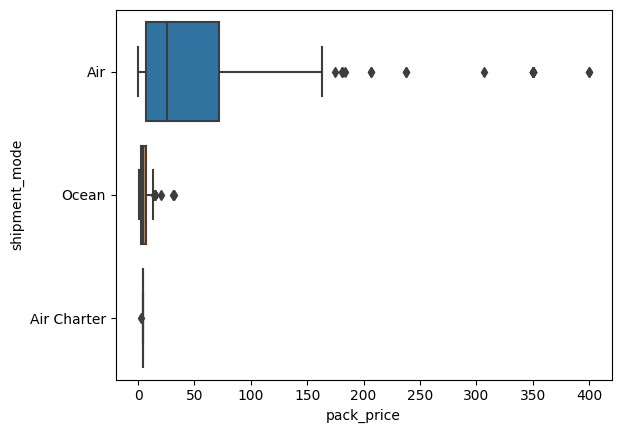

In [52]:
# Boxplot of shipment_mode vs. pack_price
sns.boxplot(x='pack_price',y='shipment_mode',data=late_shipments)
plt.show()

    There certainly looks to be a difference in the pack price between each of the three shipment modes. Do you think the differences are statistically significant?

>$H_{0}$: Pack prices for every category of shipment mode are the same.
<br>
<br>
>$H_{A}$: Pack prices for some categories of shipment mode are different.

In [53]:
alpha = 0.1
# Run an ANOVA for pack_price across shipment_mode
anova_results = pingouin.anova(data=late_shipments,dv='pack_price',between='shipment_mode') #dv: dependent variable

# Print anova_results
print(anova_results)

          Source  ddof1  ddof2        F         p-unc       np2
0  shipment_mode      2    997  21.8646  5.089479e-10  0.042018


    There is a significant difference in pack prices between the shipment modes. However, we don't know which shipment modes this applies to.

    The ANOVA test didn't tell you which categories of shipment mode had significant differences in pack prices. To pinpoint which categories had differences, you could instead use pairwise t-tests.

In [54]:
pairwise_results = pingouin.pairwise_tests(data=late_shipments, 
                                           dv="pack_price",
                                           between="shipment_mode",
                                           padjust="bonf")

# Print pairwise_results
print(pairwise_results)

        Contrast            A            B  Paired  Parametric          T  \
0  shipment_mode          Air  Air Charter   False        True  21.179625   
1  shipment_mode          Air        Ocean   False        True  19.335760   
2  shipment_mode  Air Charter        Ocean   False        True  -3.170654   

          dof alternative         p-unc        p-corr p-adjust       BF10  \
0  600.685682   two-sided  8.748346e-75  2.624504e-74     bonf  5.809e+76   
1  986.979785   two-sided  6.934555e-71  2.080367e-70     bonf  1.129e+67   
2   35.615026   two-sided  3.123012e-03  9.369037e-03     bonf     15.277   

     hedges  
0  0.726592  
1  0.711119  
2 -0.423775  


    After applying the Bonferroni adjustment, the p-values for the t-tests between each of the three groups are all less than 0.1.

****
### Using Z-score for test for single proportions

$$z=\frac{\hat{p}-p_{0}}{\sqrt{\frac{p_{0}*(1-p_{0})}{n}}}$$

In [55]:
# Hypothesize that the proportion of late shipments is 6%
p_0 = 0.06

# Calculate the sample proportion of late shipments
p_hat = (late_shipments['late'] == "Yes").mean()

# Calculate the sample size
n = len(late_shipments)

# Calculate the numerator and denominator of the test statistic
numerator = p_hat - p_0
denominator = np.sqrt(p_0 * (1 - p_0) / n)

# Calculate the test statistic
z_score = numerator / denominator

# Calculate the p-value from the z-score
p_value = 1-norm.cdf(z_score,loc=0,scale=1)

# Print the p-value
print(p_value)

0.44703503936503364


    While bootstrapping can be used to estimate the standard error of any statistic, it is computationally intensive. For proportions, using a simple equation of the hypothesized proportion and sample size is easier to compute.

### Comparing two proportions
$H_{0}$: Proportion of hobbist user is the same for those under thirty as those at least thirty
<br>
$H_{0}$: $p_{\ge30}$ - $p_{<30}$ = 0
<br>
<br>
$H_{A}$: Proportion of hobbist user is different for those under thirty to those at least thirty
<br>
$H_{A}$: $p_{\ge30}$ - $p_{<30}$ $\neq$ 0
<br>
<br>
- z-score equation for a proportion test:
$$ z = \frac{(\hat{p}_{\ge30}-\hat{p}_{<30})-0}{SE(\hat{p}_{\ge30}-\hat{p}_{<30})}$$

- Standard error equation:
$$ SE(\hat{p}_{\ge30}-\hat{p}_{<30}) = \sqrt{\frac{\hat{p}*(1-\hat{p})}{n_{\ge30}}+\frac{\hat{p}*(1-\hat{p})}{n_{<30}}}$$

- $\hat{p}~~$ $\rightarrow~~$ weighted mean of $\hat{p}_{\ge30}$ and $\hat{p}_{<30}$:
$$ \hat{p} = \frac{n_{\ge30}*\hat{p}_{\ge30} + n_{<30}*\hat{p}_{<30}}{n_{\ge30} + n_{<30}}

In [56]:
p_hats = stack_overflow.groupby('age_cat')['hobbyist'].value_counts(normalize=True)
p_hats

age_cat      hobbyist
At least 30  Yes         0.773333
             No          0.226667
Under 30     Yes         0.843105
             No          0.156895
Name: hobbyist, dtype: float64

In [57]:
p_hat_at_least_30 = p_hats[('At least 30','Yes')]
p_hat_under_30 = p_hats[('Under 30','Yes')]
print(p_hat_at_least_30,p_hat_under_30)

0.7733333333333333 0.8431048720066061


In [58]:
n = stack_overflow.groupby('age_cat')['hobbyist'].count()
n

age_cat
At least 30    1050
Under 30       1211
Name: hobbyist, dtype: int64

In [59]:
n_at_least_30 = n['At least 30']
n_under_30 = n['Under 30']
print(n_at_least_30,n_under_30)

1050 1211


In [60]:
p_hat = (n_at_least_30 * p_hat_at_least_30 + n_under_30 * p_hat_under_30) / (n_at_least_30 + n_under_30)
std_error = np.sqrt(p_hat * (1-p_hat)/n_at_least_30 + p_hat * (1-p_hat)/n_under_30)
z_score = (p_hat_at_least_30 - p_hat_under_30)/std_error
print(z_score)

-4.223691463320559


### using ***proportions_ztest()***

In [61]:
stack_overflow.groupby('age_cat')['hobbyist'].value_counts()

age_cat      hobbyist
At least 30  Yes          812
             No           238
Under 30     Yes         1021
             No           190
Name: hobbyist, dtype: int64

In [69]:
n_hobbyists = np.array([812,1021])
n_rows = np.array([812+238,1021+190])

from statsmodels.stats.proportion import proportions_ztest
z_score,p_value = proportions_ztest(count=n_hobbyists,nobs=n_rows,alternative='two-sided')
print(z_score,p_value)

-4.223691463320559 2.403330142685068e-05


    We can conclude that there is a difference in the proportion of hobbyists between the two age groups.

In [63]:
late_shipments.groupby('freight_cost_groups')['late'].value_counts(normalize=True)

freight_cost_groups  late
expensive            No      0.920904
                     Yes     0.079096
reasonable           No      0.964835
                     Yes     0.035165
Name: late, dtype: float64

In [64]:
late_shipments.groupby('freight_cost_groups')['late'].count()

freight_cost_groups
expensive     531
reasonable    455
Name: late, dtype: int64

### Chi-Square test of independence
Just as ANOVA extends t-tests to more than two groups, chi-square tests of independence extend proportion tests to more than two groups.

In [70]:
stack_overflow['age_cat'].value_counts()

Under 30       1211
At least 30    1050
Name: age_cat, dtype: int64

In [71]:
stack_overflow['job_sat'].value_counts()

Very satisfied           879
Slightly satisfied       680
Slightly dissatisfied    342
Neither                  201
Very dissatisfied        159
Name: job_sat, dtype: int64

In [72]:
props = stack_overflow.groupby('job_sat')['age_cat'].value_counts(normalize=True)
props

job_sat                age_cat    
Very dissatisfied      Under 30       0.509434
                       At least 30    0.490566
Slightly dissatisfied  Under 30       0.532164
                       At least 30    0.467836
Neither                Under 30       0.567164
                       At least 30    0.432836
Slightly satisfied     Under 30       0.564706
                       At least 30    0.435294
Very satisfied         Under 30       0.511945
                       At least 30    0.488055
Name: age_cat, dtype: float64

In [73]:
wide_props = props.unstack()
wide_props

age_cat,At least 30,Under 30
job_sat,,
Very dissatisfied,0.490566,0.509434
Slightly dissatisfied,0.467836,0.532164
Neither,0.432836,0.567164
Slightly satisfied,0.435294,0.564706
Very satisfied,0.488055,0.511945


<AxesSubplot: xlabel='job_sat'>

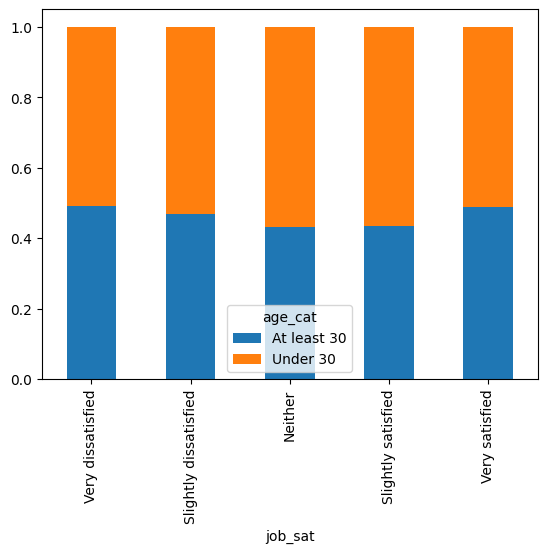

In [75]:
wide_props.plot(kind='bar',stacked=True)

If the age category was independent of job satisfaction, the split between the age categories would be at the same height in each of the five bars. We'll need a chi-square independent test to determine whether it's a significant difference.

In [76]:
expected, observed, stats = pingouin.chi2_independence(data=stack_overflow,x='job_sat',y='age_cat',correction=False)
print(stats)

                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  5.552373  4.0  0.235164  0.049555  0.437417
1        cressie-read  0.666667  5.554106  4.0  0.235014  0.049563  0.437545
2      log-likelihood  0.000000  5.558529  4.0  0.234632  0.049583  0.437871
3       freeman-tukey -0.500000  5.562688  4.0  0.234274  0.049601  0.438178
4  mod-log-likelihood -1.000000  5.567570  4.0  0.233854  0.049623  0.438538
5              neyman -2.000000  5.579519  4.0  0.232828  0.049676  0.439419


The p-values are 0.23, so we conclude that age categories are independent of job satisfaction.

### Swapping the variables

<AxesSubplot: xlabel='age_cat'>

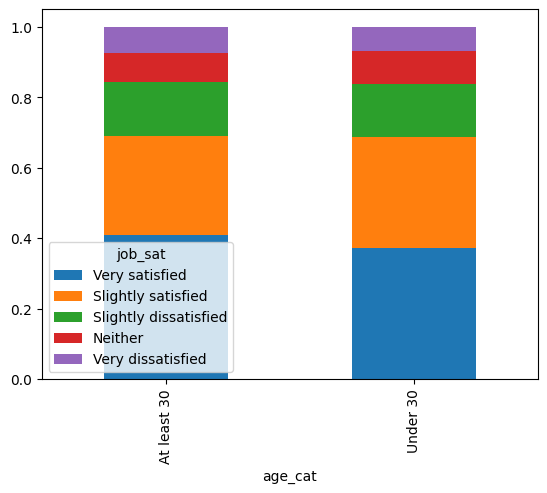

In [77]:
props = stack_overflow.groupby('age_cat')['job_sat'].value_counts(normalize=True)
wide_props = props.unstack()
wide_props.plot(kind='bar',stacked=True)

In [78]:
expected, observed, stats = pingouin.chi2_independence(data=stack_overflow,x='age_cat',y='job_sat',correction=False)
print(stats)

                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  5.552373  4.0  0.235164  0.049555  0.437417
1        cressie-read  0.666667  5.554106  4.0  0.235014  0.049563  0.437545
2      log-likelihood  0.000000  5.558529  4.0  0.234632  0.049583  0.437871
3       freeman-tukey -0.500000  5.562688  4.0  0.234274  0.049601  0.438178
4  mod-log-likelihood -1.000000  5.567570  4.0  0.233854  0.049623  0.438538
5              neyman -2.000000  5.579519  4.0  0.232828  0.049676  0.439419


If we run the chi-square test with the variables swapped, then the results are identical,since the order doesn't matter.


    The Question should be: Are the variable X and Y independent?

What about diretion and tails?
> This is because the chi-square test statistic is based on the squar4e of observed and expected counts, and square numbers are non-negative. Chi-square tests are almost always right-tailed.

>  Like the t-distribution, the chi-square distribution has degrees of freedom and non-centrality parameters. When these numbers are large, the chi-square distribution can be approximated by a normal distribution.



In [98]:
late_shipments = late_shipments.loc[~(late_shipments['vendor_inco_term']=='DDU')]
late_shipments

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2996.0,266644.00,89.00,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,25.0,800.00,32.00,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,...,22925.0,110040.00,4.80,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57
3,17648.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,...,152535.0,361507.95,2.37,0.04,"Aurobindo Unit III, India",Yes,7698.0,11372.23,expensive,779.41
4,5647.0,Uganda,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test - Ancillary,...,850.0,8.50,0.01,0.00,Inverness Japan,Yes,56.0,360.00,reasonable,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,13608.0,Uganda,PMO - US,Direct Drop,DDP,Air,0.0,No,ARV,Adult,...,121.0,9075.00,75.00,0.62,"Janssen-Cilag, Latina, IT",Yes,43.0,199.00,reasonable,12.72
996,80394.0,"Congo, DRC",PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,292.0,9344.00,32.00,1.60,"Trinity Biotech, Plc",Yes,99.0,2162.55,reasonable,13.10
997,61675.0,Zambia,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2127.0,170160.00,80.00,0.80,"Alere Medical Co., Ltd.",Yes,881.0,14019.38,expensive,210.49
998,39182.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,...,191011.0,861459.61,4.51,0.15,"Aurobindo Unit III, India",Yes,16234.0,14439.17,expensive,1421.41


The late_shipments dataset includes a vendor_inco_term that describes the incoterms that applied to a given shipment. The choices are:

- EXW: "Ex works". The buyer pays for transportation of the goods.
- CIP: "Carriage and insurance paid to". The seller pays for freight and insurance until the goods board a ship.
- DDP: "Delivered duty paid". The seller pays for transportation of the goods until they reach a destination port.
- FCA: "Free carrier". The seller pays for transportation of the goods.


>$H_{0}$: vendor_inco_term and freight_cost_group are independent.

>$H_{A}$: vendor_inco_term and freight_cost_group are associate.


In [102]:
props = late_shipments.groupby('vendor_inco_term')['freight_cost_groups'].value_counts(normalize=True)

In [103]:
wide_props = props.unstack()

<AxesSubplot: xlabel='vendor_inco_term'>

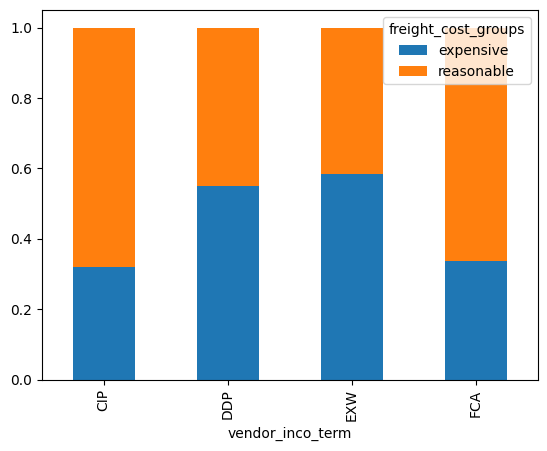

In [104]:
wide_props.plot(kind='bar',stacked=True)

In [106]:
# Determine if freight_cost_group and vendor_inco_term are independent
expected, observed, stats = pingouin.chi2_independence(data=late_shipments,x='vendor_inco_term',y='freight_cost_groups',correction=False)
# Print results
print(stats[stats['test'] == 'pearson']) 

      test  lambda     chi2  dof          pval    cramer     power
0  pearson     1.0  33.6426  3.0  2.357026e-07  0.183511  0.999424


    Reject the null hypothesis and conclude that vendor_inco_term and freight_cost_group are associated.

In [138]:
purple_link_counts = stack_overflow['purple_link'].value_counts()
purple_link_counts

Hello, old friend    1225
Indifferent           405
Amused                368
Annoyed               263
Name: purple_link, dtype: int64

In [139]:
purple_link_counts = purple_link_counts.reset_index().rename(columns={'index':'purple_link','purple_link':'n'}).sort_values(by='purple_link')
purple_link_counts

,purple_link,n
2,Amused,368
3,Annoyed,263
0,"Hello, old friend",1225
1,Indifferent,405


In [141]:
hypothesized = pd.DataFrame({
    'purple_link':['Amused','Annoyed','Hello, old friend','Indifferent'],
    'prop':[1/6,1/6,1/2,1/6]
})
hypothesized

,purple_link,prop
0,Amused,0.166667
1,Annoyed,0.166667
2,"Hello, old friend",0.500000
3,Indifferent,0.166667


In [144]:
n_total = len(stack_overflow)
hypothesized['n'] = hypothesized['prop'] * n_total
hypothesized

,purple_link,prop,n
0,Amused,0.166667,376.833333
1,Annoyed,0.166667,376.833333
2,"Hello, old friend",0.500000,1130.500000
3,Indifferent,0.166667,376.833333


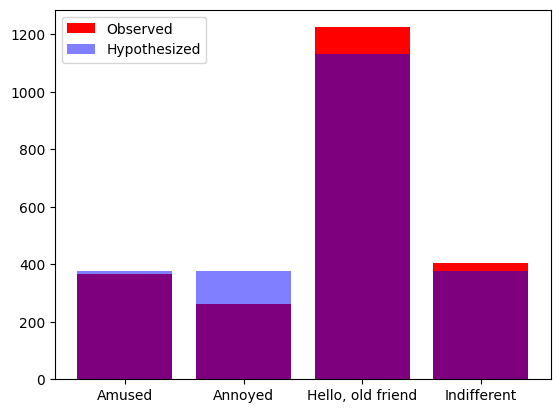

In [147]:
plt.bar(purple_link_counts['purple_link'],purple_link_counts['n'],color = 'red',label='Observed')
plt.bar(hypothesized['purple_link'],hypothesized['n'],alpha=0.5,color='blue',label='Hypothesized')
plt.legend()
plt.show()

You'll need to perform a chi-square goodness of fit test to see whether the differences are statistically significant.

### Chi-square goodness of fit

The chi-square goodness of fit test compares proportions of each level of a categorical variable to hypothesized values.
The one-sample chi-square test is called a goodness of fit test, as we're testing how well our hypothesized data fits the observed data.

In [148]:
from scipy.stats import chisquare
chisquare(f_obs=purple_link_counts['n'],f_exp=hypothesized['n'])

Power_divergenceResult(statistic=44.59840778416629, pvalue=1.1261810719413759e-09)

    The p-value is very small, so we can conclude that the sample distribution of proportions is different from the hypothesized distribution.

#### Independence of observation
- Assumption
> Each obeservation (row) in the dataset is independent.
    There are some special cases like paired t-tests where dependencies between two samples are allowed, but these change the calculations, so we need to understand where such dependencies occur. 
- Consequence
> Increased chance of false negative/postive errors

#### Large sample size
- Assumption
> the sample is big enough to mitigate uncertainty, so that the central limit theorem applies  
- Consequence
> Wider confidence intervals on the parameter we are trying to estimate: if the central limit theorem does not apply, the calculations on the sample, and conclusions draw from them, could be nonsense, which increases the chance of false negative/positve errors
> 1. one sample:at least 30 observations in the sample | The number of success in sample is n x $\hat{p}$ $\ge$ 10;The number of success in sample is n x (1-$\hat{p}$) $\ge$ 10
> 2. two samples: at least 30 observations in each sample | The number of success in sample is $n_{i}$ x $\hat{p}$ $\ge$ 10;The number of success in sample is $n_{i}$ x (1-$\hat{p}$) $\ge$ 10
> 3. paired samples: at least 30 pairs of observations across the samples
> 4. ANOVA: at least 30 observations in each sample
> 5. Chisquare tests: $n_{i}$ x $\hat{p}$ $\ge$ 5;The number of success in sample is $n_{i}$ x (1-$\hat{p}$) $\ge$ 5
#### Sanity Check
> if the bootstrap distribution doesn't look normal, assumptions(randomness, independence and sample size) likely aren't valid




In [150]:
# Count the freight_cost_group values
counts = late_shipments.freight_cost_groups.value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 30).all())

expensive     531
reasonable    454
Name: freight_cost_groups, dtype: int64
True


In [151]:
# ANOVA
# Count the shipment_mode values
counts = late_shipments.shipment_mode.value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 30).all())

Air            905
Ocean           88
Air Charter      6
Name: shipment_mode, dtype: int64
False


In [152]:
# Chi-Square
# Count the values of freight_cost_group grouped by vendor_inco_term
counts = late_shipments.groupby('vendor_inco_term').freight_cost_groups.value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 5).all())

vendor_inco_term  freight_cost_groups
CIP               reasonable              34
                  expensive               16
DDP               expensive               55
                  reasonable              45
EXW               expensive              423
                  reasonable             302
FCA               reasonable              73
                  expensive               37
Name: freight_cost_groups, dtype: int64
True


In [153]:
# one-sample proportion test
# Count the late values
counts = late_shipments.late.value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 10).all())

No     938
Yes     61
Name: late, dtype: int64
True


### Parametric Tests
- z-test,t-test, and ANOVA are all parametric tests
- Assume a normal distribution
- Require sufficiently large sample sizes that the central limit theorem applies

In [166]:
rep_votes_small = rep_vote.sample(5)
rep_votes_small

,state,county,repub_percent_08,repub_percent_12,diff
67,Rhode Island,Kent,40.178890,39.997212,0.181678
34,Kentucky,Taylor,69.686924,68.958904,0.728020
39,Michigan,Cheboygan,49.780591,54.736684,-4.956093
83,Texas,Terrell,62.235067,64.504505,-2.269437
44,Missouri,Iron,47.349343,55.867031,-8.517688


5 pairs is not enough to meet the sample size condition for the paired t-test
- at least 30 pairs of observations across the samples.

In [167]:
pingouin.ttest(x=rep_votes_small['repub_percent_08'],y=rep_votes_small['repub_percent_12'],paired=True,alternative='less')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.729914,4,less,0.079349,"[-inf, 0.69]",0.257549,1.984,0.12303


### Non-parametric tests
- Non-parametric tests avoid the parametric assumptions and conditions
- They don't make the normal distribution assumptions or the sample size conditions
- Many non-parametric tests use **ranks** of the data
- Non-parametric tests are more reliable than parametric tests for small sample sizes and when data isn't normally distributed

In [178]:
x = [1,15,3,10,6]

In [177]:
from scipy.stats import rankdata
rankdata(x)

array([1., 5., 2., 4., 3.])

Wilcoxon-signed rank test
- The Wilcoxon signed-rank test works well when the assumptions of a paired t-test aren't met
- works on the ranked absolute differences between the pairs of data
- incorporate the sum of the ranks for negative and positive differences

In [170]:
rep_votes_small['abs_diff'] = rep_votes_small['diff'].abs()
rep_votes_small

,state,county,repub_percent_08,repub_percent_12,diff,abs_diff
67,Rhode Island,Kent,40.178890,39.997212,0.181678,0.181678
34,Kentucky,Taylor,69.686924,68.958904,0.728020,0.728020
39,Michigan,Cheboygan,49.780591,54.736684,-4.956093,4.956093
83,Texas,Terrell,62.235067,64.504505,-2.269437,2.269437
44,Missouri,Iron,47.349343,55.867031,-8.517688,8.517688


In [179]:
rep_votes_small['rank_abs_diff'] = rankdata(rep_votes_small['abs_diff'])
print(rep_votes_small)

           state     county  repub_percent_08  repub_percent_12      diff  \
67  Rhode Island       Kent         40.178890         39.997212  0.181678   
34      Kentucky     Taylor         69.686924         68.958904  0.728020   
39      Michigan  Cheboygan         49.780591         54.736684 -4.956093   
83         Texas    Terrell         62.235067         64.504505 -2.269437   
44      Missouri       Iron         47.349343         55.867031 -8.517688   

    abs_diff  rank_abs_diff  
67  0.181678            1.0  
34  0.728020            2.0  
39  4.956093            4.0  
83  2.269437            3.0  
44  8.517688            5.0  


In [182]:
T_neg_diff  = 4+3+5
T_pos_diff = 1+2

In [183]:
W = np.min([T_neg_diff,T_pos_diff])
W

3

In [184]:
pingouin.wilcoxon(x=rep_votes_small['repub_percent_08'],y=rep_votes_small['repub_percent_12'],alternative='less')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,3.0,less,0.15625,-0.6,0.56


The p-value is 2 times larger than the p-value from the ttest, so we should feel more confident with this result given the small sample size.
The Wilcoxon test indicates that we do not have evidence that the 2008 republican percentages are smaller than 2012 percentages using this small sample of five rows.

### Non parametric ANOVA and unpaired t-tests
- Wilcoxon-Mann-Whitney test
    - A t-test on the ranks of the numeric input
    - works on unpaired data

In [185]:
age_vs_comp = stack_overflow[['converted_comp','age_first_code_cut']]
age_vs_comp

,converted_comp,age_first_code_cut
0,77556.0,adult
1,74970.0,child
2,594539.0,child
3,2000000.0,adult
4,37816.0,adult
...,...,...
2256,145000.0,child
2257,33972.0,child
2258,97284.0,child
2259,72000.0,child


In [186]:
age_vs_comp_wide = age_vs_comp.pivot(columns='age_first_code_cut',values='converted_comp')
age_vs_comp_wide
# An adult value of NaN corresponds to a child entry and a child value of NaN corresponds to an adult entry

age_first_code_cut,adult,child
0,77556.0,NaN
1,NaN,74970.0
2,NaN,594539.0
3,2000000.0,NaN
4,37816.0,NaN
...,...,...
2256,NaN,145000.0
2257,NaN,33972.0
2258,NaN,97284.0
2259,NaN,72000.0


In [187]:
pingouin.mwu(x=age_vs_comp_wide['child'],y=age_vs_comp_wide['adult'],alternative='greater')

,U-val,alternative,p-val,RBC,CLES
MWU,744365.5,greater,1.902723e-19,-0.222516,0.611258


### Kruskal-Wallis test
- Kruskal-Wallis test is to Wilcoxon-Mann-Whitney test as ANOVA is to t-test (Non-Parametric version of ANOVA)
- works on long data

In [188]:
pingouin.kruskal(data=stack_overflow,dv='converted_comp',between='job_sat')

,Source,ddof1,H,p-unc
Kruskal,job_sat,4,72.814939,5.772915e-15


    The Kruskal-Wallis test yielded a very small p-value, so there is evidence that at least one of the three groups of converted_comp has a different job_sat distribution than the others.